# increase accuracy: 
## 1. Finding the most optimal C and gamma using grid search.
## 2. Finding the most discriminative feature using F-score.

In [37]:
import pandas as pd
df_M = pd.read_csv('ReadyM1000_200_0228.csv')
df_F = pd.read_csv('ReadyF1000_200_0228.csv')

df1_M = df_M.iloc[:,1:]
df1_F = df_F.iloc[:,1:]
print (df1_M.shape)
print (df1_F.shape)

(1899, 1231)
(5564, 1231)


In [4]:
df1_F

,label,w2v_key_0,w2v_key_1,w2v_key_2,w2v_key_3,w2v_key_4,w2v_key_5,w2v_key_6,w2v_key_7,w2v_key_8,...,question,exclaim,bracket,ano_1,ano_2,ano_3,crush_1,crush_2,crush_3,crush_4
0,2,-0.003865,0.016236,0.016059,-0.023997,-0.021516,0.007525,-0.003001,-0.007643,-0.021347,...,0.000000,0.000000,0.004274,1,1,0,0,1,0,0
1,0,-0.007306,0.011842,0.016379,-0.028848,-0.026123,0.016086,0.008825,0.012566,-0.013684,...,0.000000,0.000000,0.013174,1,1,0,0,0,1,0
2,0,0.002200,0.014738,0.031344,-0.006113,-0.014888,-0.004157,0.011216,0.039134,-0.022351,...,0.004861,0.011181,0.006320,1,1,0,0,0,1,0
3,3,-0.000416,0.031031,0.050523,-0.052399,-0.057591,-0.000194,0.031857,0.002040,-0.008779,...,0.000000,0.000000,0.000000,1,1,0,0,1,0,0
4,1,-0.027435,-0.073629,0.118453,0.000135,-0.063554,0.067057,-0.090824,0.027772,-0.025290,...,0.009901,0.000000,0.000000,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,2,0.023923,0.026582,0.170401,-0.009743,-0.082327,0.000638,-0.019593,0.157125,0.001352,...,0.023148,0.004630,0.004630,0,1,1,0,1,0,0
5567,0,0.069446,-0.006886,0.022364,-0.051795,-0.052784,0.053161,0.008254,0.015815,-0.050410,...,0.000000,0.000000,0.004831,0,1,0,0,0,1,0
5568,1,0.014826,0.002926,0.015140,-0.046354,-0.024835,0.029137,-0.017067,0.004784,-0.005389,...,0.007042,0.000000,0.009390,0,1,0,0,0,0,0
5569,0,0.023154,-0.040111,0.043670,-0.043374,-0.039188,-0.027308,-0.025167,0.021847,-0.098177,...,0.009434,0.000000,0.009434,1,1,0,0,0,0,1


In [11]:
import warnings
warnings.filterwarnings('always')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile, f_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score # 看clf效果好不好
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC

df_M = pd.read_csv('ReadyM_w2v_0730.csv')
df1_M = df_M.iloc[:,1:]
cname = list(df1_M.columns)[1:]

# df_F = pd.read_csv('ReadyF_w2v_0730.csv')
# df1_F = df_F.iloc[:,1:]
# cname = list(df1_F.columns)[1:]

print (len(cname))

def Scaler(data):
    X = data[cname]
    y = data[['label']]
    # sc = StandardScaler()
    sc = MinMaxScaler()
    sc.fit(X)
    X = sc.transform(X)
    return X, y

# Univariate feature selection with F-test for feature scoring
def FeatureSelection(x, Y, k):
    Y = Y.values.ravel()
    selector = SelectPercentile(chi2, percentile=k).fit_transform(x, Y)    
    print (x.shape, selector.shape)
    return selector
    
def TrainTest(Data, percent):
    X, y = Scaler(Data)
    X_new = FeatureSelection(X, y, percent)
    y = y.values.ravel()
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

    print ('X_train:', X_train.shape)
    clf = SVC(gamma='scale')
#     clf = SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='rbf',
#     max_iter=-1, probability=False, random_state=None, shrinking=True,
#     tol=0.001, verbose=False)

    clf.fit(X_train, y_train)
    result = cross_val_score(clf, X_new, y, cv=5, scoring='accuracy')
    cv_Acc = sum(result)/5.0
    
    y_p = clf.predict(X_test)
    y_t = y_test 
       
    return y_p, y_t, cv_Acc


max_kkk, max_acc = 0, 0
kkk = np.arange(15,90,5)
for k in kkk:
    y_pred, y_true, cv_Accuracy = TrainTest(df1_F, k)
    print ('KKK={}'.format(k), ', Accuracy =', cv_Accuracy)
    
    if cv_Accuracy > max_acc:
        max_acc = cv_Accuracy
        max_kkk = k    
    print ()
    
print ('F_w2v_tfidf_{}: max_kkk={}, max_acc={}'.format(800, max_kkk, max_acc))
print ()
# confusion_matrix = confusion_matrix(y_true, y_pred)
# print(confusion_matrix)
# classification_report = classification_report(y_true, y_pred, output_dict = False)
# print(classification_report)
    

833
(5571, 833) (5571, 125)
X_train: (3899, 125)
KKK=15 , Accuracy = 0.2958201785687299

(5571, 833) (5571, 167)
X_train: (3899, 167)
KKK=20 , Accuracy = 0.29079630355464

(5571, 833) (5571, 208)
X_train: (3899, 208)
KKK=25 , Accuracy = 0.29240968549794444

(5571, 833) (5571, 250)
X_train: (3899, 250)
KKK=30 , Accuracy = 0.293310093768841

(5571, 833) (5571, 292)
X_train: (3899, 292)
KKK=35 , Accuracy = 0.2952868994218726

(5571, 833) (5571, 333)
X_train: (3899, 333)
KKK=40 , Accuracy = 0.2943901991646592

(5571, 833) (5571, 375)
X_train: (3899, 375)
KKK=45 , Accuracy = 0.29654185929100757

(5571, 833) (5571, 416)
X_train: (3899, 416)
KKK=50 , Accuracy = 0.29366851671102584

(5571, 833) (5571, 458)
X_train: (3899, 458)
KKK=55 , Accuracy = 0.2945647330535574

(5571, 833) (5571, 500)
X_train: (3899, 500)
KKK=60 , Accuracy = 0.29169622704907283

(5571, 833) (5571, 541)
X_train: (3899, 541)
KKK=65 , Accuracy = 0.29062079837366694

(5571, 833) (5571, 583)
X_train: (3899, 583)
KKK=70 , Accur

In [ ]:
# 勝出的比率
F_w2v_tfidf_250:  KKK=55 , Accuracy = 0.293665726946899
M_w2v_tfidf_250:  KKK=85 , Accuracy = 0.32650024538243455
F_w2v_tfidf_500: max_kkk=55, max_acc=0.2951053841399678    
M_w2v_tfidf_500: max_kkk=80, max_acc=0.32494352484436734
M_w2v_tfidf_800: max_kkk=20, max_acc=0.32719005191862727

In [7]:
check = np.isnan(df1_F).any()
print (check)

label        False
w2v_key_0    False
w2v_key_1    False
w2v_key_2    False
w2v_key_3    False
             ...  
ano_3        False
crush_1      False
crush_2      False
crush_3      False
crush_4      False
Length: 934, dtype: bool


male
17.5: 0.4017
    clf = SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0625, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    
20: 0.4064 (17.5)

female: 
SVC(C=512, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.000244140625, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
20: 0.3323
25: 0.3360
28: 0.3369
29: 0.3427, 0.3486
30: 0.3412, 0.3497
31: 0.3425, 0.3475
35: 0.3400

male: 
18: 0.3975
19: 0.3826
20: 0.3855
21: 0.3855
22: 0.3836
30: 0.3697

female:
19: 
20: 0.3362
30: 0.3431

male: <br>
p=21,  cv_acc=0.416469983025764<br>
  <br> 
female: <br>
p=26,  cv_acc=0.34938826480722224<br>

male: (700, 750, 800, 850)
15: 0.3759, 0.3845, 
18:         0.3879, 0.3922
19: 0.3802, 0.3874, 0.3917
20: 0.3817, 0.3836, 0.3980, 0.3855
21: 0.3759,       , 0.3846
22: 0.3702, 
25: 0.3625,       , 0.3841, 0.3908
27:               , 0.3802, 0.3941
29:               , 0.3898, 0.3970
30: 0.3582, 0.3654, 0.3984, 0.3932
31:               , 0.3903
35:               , 0.3841
50: 0.3429, 0.3481, 
--> 800, 20, 0.3980

female: 
25: 0.3389                , 0.3495
26: 0.3420
28: 0.3442
30: 0.3458, 0.3445, 0.3506, 0.3503
31: 0.3487, 0.3490, 0.3485, 0.3512
32: 0.3487, 0.3474, 0.3506, 0.3539
33: 0.3402                , 0.3538
35: 0.3423, 0.3464, 0.3404, 0.3491
40: 0.3400
100: 0.27
--> 850, 32, 0.3539

male:(200, 300)
20: 0.3936, 0.3869
25: 0.3936, 
28: 0.3893, 
29: 0.4008, 0.3888
30: 0.4003, 
31: 0.3960, 
35: 0.3932, 0.3903
--> 800, 200, 29
    
    
female:
19: 0.3480
20: 0.3573
21: 0.3499
25: 0.3515
30: 0.3549
32: 0.3571
--> 850, 200, 32
    

In [ ]:
發現：用CKIP斷詞，每個維度的貢獻程度較接近

In [39]:
df_F.shape

(5593, 794)

# grid search

In [136]:
df_M = pd.read_csv('ReadyM800_200_0225.csv')
df_F = pd.read_csv('ReadyF850_200_0225.csv')

In [292]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Load and prepare data set
#
# dataset for grid search

# iris = load_iris()
# X = iris.data
# y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

# X_2d = X[:, :2]
# X_2d = X_2d[y > 0]
# y_2d = y[y > 0]
# y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.


X, y = Scaler(df1_M)
X_new = FeatureSelection(X, y, 18)
y = y.values.ravel()
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)


C_range = [2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8]
gamma_range = [2**-13, 2**-12, 2**-11, 2**-10, 2**-19, 2**-8, 2**-7, 2**-6, 2**-5, 2**-4]
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %f"
      % (grid.best_params_, grid.best_score_))

(2088, 1026) (2088, 185)


KeyboardInterrupt: 

# 女生 grid search

In [17]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


X, y = Scaler(df1_F)
X_new = FeatureSelection(X, y, 30)
y = y.values.ravel()
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=0)

# Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [1, 2, 10, 100, 1000]}]
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [2**-13, 2**-12, 2**-11, 2**-10, 2**-19, 2**-8, 2**-7, 2**-6, 2**-5, 2**-4, 2**-3, 2**-2],
                     'C': [2**0, 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12]}]

# scores = ['precision', 'recall', 'f1']


# print("# Tuning hyper-parameters for %s" % score)
# print()
# clf = GridSearchCV(SVC(), tuned_parameters, scoring='%s_macro'%score, cv=5)

clf = GridSearchCV(SVC(), tuned_parameters, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_score_, clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.4f for %r" % (mean, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)

confusion_matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)
print(classification_report(y_true, y_pred))
print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

(1899, 283) (1899, 85)
Best parameters set found on development set:

0.32724719101123595 {'C': 1, 'gamma': 0.0625, 'kernel': 'rbf'}

Grid scores on development set:

0.3034 for {'C': 1, 'gamma': 0.0001220703125, 'kernel': 'rbf'}
0.3034 for {'C': 1, 'gamma': 0.000244140625, 'kernel': 'rbf'}
0.3034 for {'C': 1, 'gamma': 0.00048828125, 'kernel': 'rbf'}
0.3034 for {'C': 1, 'gamma': 0.0009765625, 'kernel': 'rbf'}
0.3034 for {'C': 1, 'gamma': 1.9073486328125e-06, 'kernel': 'rbf'}
0.3034 for {'C': 1, 'gamma': 0.00390625, 'kernel': 'rbf'}
0.3034 for {'C': 1, 'gamma': 0.0078125, 'kernel': 'rbf'}
0.3062 for {'C': 1, 'gamma': 0.015625, 'kernel': 'rbf'}
0.3244 for {'C': 1, 'gamma': 0.03125, 'kernel': 'rbf'}
0.3272 for {'C': 1, 'gamma': 0.0625, 'kernel': 'rbf'}
0.3265 for {'C': 1, 'gamma': 0.125, 'kernel': 'rbf'}
0.3020 for {'C': 1, 'gamma': 0.25, 'kernel': 'rbf'}
0.3034 for {'C': 2, 'gamma': 0.0001220703125, 'kernel': 'rbf'}
0.3034 for {'C': 2, 'gamma': 0.000244140625, 'kernel': 'rbf'}
0.3034 for

In [15]:
# 0.32935393258426965 {'C': 8, 'gamma': 0.03125, 'kernel': 'rbf'}
clf.best_estimator_

SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 男生 grid search

In [38]:
import warnings
warnings.filterwarnings('always')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC



X, y = Scaler(df1_M)
X_new = FeatureSelection(X, y, 20)
y = y.values.ravel()
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)


tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [2**-12, 2**-11, 2**-10, 2**-19, 2**-8, 2**-7, 2**-6, 2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 1, 2, 4],
                     'C': [2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9]}]

# scores = ['precision', 'recall', 'f1']


# print("# Tuning hyper-parameters for %s" % score)
# print()
# clf = GridSearchCV(SVC(), tuned_parameters, scoring='%s_macro' % score, cv=5)

clf = GridSearchCV(SVC(), tuned_parameters, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_score_, clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.4f for %r" % (mean, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)

confusion_matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)
print(classification_report(y_true, y_pred))
print('==========================================================================')

    
# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(1899, 1230) (1899, 246)
Best parameters set found on development set:

0.3965387509405568 {'C': 16, 'gamma': 0.00390625, 'kernel': 'rbf'}

Grid scores on development set:

0.3145 for {'C': 0.25, 'gamma': 0.000244140625, 'kernel': 'rbf'}
0.3145 for {'C': 0.25, 'gamma': 0.00048828125, 'kernel': 'rbf'}
0.3145 for {'C': 0.25, 'gamma': 0.0009765625, 'kernel': 'rbf'}
0.3145 for {'C': 0.25, 'gamma': 1.9073486328125e-06, 'kernel': 'rbf'}
0.3145 for {'C': 0.25, 'gamma': 0.00390625, 'kernel': 'rbf'}
0.3145 for {'C': 0.25, 'gamma': 0.0078125, 'kernel': 'rbf'}
0.3145 for {'C': 0.25, 'gamma': 0.015625, 'kernel': 'rbf'}
0.3145 for {'C': 0.25, 'gamma': 0.03125, 'kernel': 'rbf'}
0.3145 for {'C': 0.25, 'gamma': 0.0625, 'kernel': 'rbf'}
0.3145 for {'C': 0.25, 'gamma': 0.125, 'kernel': 'rbf'}
0.3145 for {'C': 0.25, 'gamma': 0.25, 'kernel': 'rbf'}
0.3145 for {'C': 0.25, 'gamma': 0.5, 'kernel': 'rbf'}
0.3145 for {'C': 0.25, 'gamma': 1, 'kernel': 'rbf'}
0.3145 for {'C': 0.25, 'gamma': 2, 'kernel': 'rbf'}
0

[[60 22 53 14]
 [24 28 50 10]
 [36 16 98 13]
 [30 18 58 40]]
              precision    recall  f1-score   support

           0       0.40      0.40      0.40       149
           1       0.33      0.25      0.29       112
           2       0.38      0.60      0.46       163
           3       0.52      0.27      0.36       146

    accuracy                           0.40       570
   macro avg       0.41      0.38      0.38       570
weighted avg       0.41      0.40      0.39       570



In [40]:
clf.best_estimator_

SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.00390625, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [391]:
list(range(15,30))

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

male: 
18: 0.3893
19.2: 0.408, 0.3860(0.38608448623042824 {'C': 2, 'gamma': 0.0625, 'kernel': 'rbf'})
20: 0.4428, 0.4026

female:
30: 0.4555

In [135]:

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
 
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
print("Size of training set:{} size of testing set:{}".format(X_train.shape[0],X_test.shape[0]))
 
####   grid search start
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)#对于每种参数可能的组合，进行一次训练；
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:#找到表现最好的参数
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
####   grid search end
 
print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Size of training set:112 size of testing set:38
Best score:0.97
Best parameters:{'gamma': 0.001, 'C': 100}


In [153]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# 讀入sklearn的範例資料
digits = datasets.load_digits()

#  資料預處理
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)  #  1797筆
X = digits.images.reshape((n_samples, -1))
y = digits.target

# 資料切割訓練與測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# 要給gv的參數，可以看到正規化的惩法給了四個，gamma也給了兩個 kernel也用了rbf跟liner
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#  評估模型的計算得分設置了兩個，並用迴圈來執行這個gv
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    #  以5折下去做暴力尋參，用svc來做分類器
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    #  列印最佳參數
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    #  設置陣列的資料，記得參閱api
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    #  這邊依設置的參數列印出所有參數的得分狀況
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [1074] are constant.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(2088, 1076) (2088, 312)
# Tuning hyper-parameters for precision



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', ave

KeyboardInterrupt: 

In [15]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [154]:
X, y = Scaler(df1_M)
X_new = FeatureSelection(X, y, 29)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

(2088, 1076) (2088, 312)


/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [1074] are constant.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


# cross validation

In [ ]:
def CrossValidation(data):
    X = data[cname]
    y = data[['label']]
    sc = StandardScaler()
    sc.fit(X)
    X_std = sc.transform(X)
    
    clf = SVC()
    result = cross_val_score(clf, X_std, y, cv=5, scoring='accuracy')
    print (sum(result)/5)
    
CrossValidation(df1_M)
CrossValidation(df1_F)

In [72]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape
# (1797, 64)
X_new = SelectPercentile(f_classif, percentile=10).fit_transform(X, y)
X_new.shape
# (1797, 7)

/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(1797, 7)

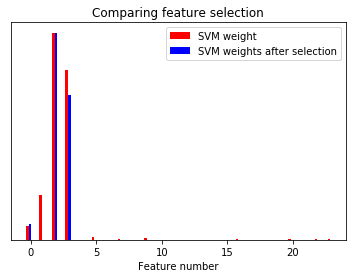

In [55]:
###############################################################################
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()